# Package of the Week 🐍 📦

## package: ipywidgets

## date: 13/03/2019 

This package allows interactive controls in Jupyter Notebooks

In [2]:
! echo pip install ipywidgets

pip install ipywidgets


#### For Notebook:   
```bash
jupyter nbextension install widgetsnbextension --user --py
jupyter nbextension enable widgetsnbextension --user --py
jupyter nbextension list
```

#### For lab:  
```bash
jupyter labextension install @jupyter-widgets/jupyterlab-manager
jupyter labextension enable @jupyter-widgets/jupyterlab-manager
jupyter labextension list
```

Ok now it is enabled we import!

In [4]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [5]:
@interact
def greeting(text="World",s=[1,100]):
        print("Hello {} {}".format(text,s))


interactive(children=(Text(value='World', description='text'), Dropdown(description='s', options=(1, 100), val…

In [6]:
import pandas as pd
import numpy as np
import random
from datetime import datetime
from dateutil.relativedelta import relativedelta

# First we create example dataframe
r = random.Random(12)


def generate_random_date_in_last_year():
    return (datetime.now() - relativedelta(days=365 * random.random())).date()


dataframe = pd.DataFrame({
    "date_time": [generate_random_date_in_last_year() for _ in range(10)],
    "animal": ['zebra', 'zebra', 'zebra', 'zebra', 'lion', 'lion', 'lion',
               'lion', 'rhino', 'rhino', ],
    "category": ['stripy'] * 4 + ['dangerous'] * 6,
    "name": ['Walter', 'Edmund', 'Gyles', 'John', 'Bartholomew', 'Frederyk',
             'Raulf', 'Symond', 'Carlos', 'Arthur'],
    "weight": [80 + 40 * r.random() for _ in range(10)],
    "favourite_integer": [r.randint(0, 100) for _ in range(10)],
    "bad_column": ['', 3, '', 1, None, 2, 23, 2, 3, 3],
    'employed': [bool(r.randint(0, 1)) for i in range(10)]
})
dataframe.replace(to_replace='', value=np.nan, inplace=True)

In [7]:
dataframe.head()

,date_time,animal,category,name,weight,favourite_integer,bad_column,employed
0,2019-01-13,zebra,stripy,Walter,98.982827,71,NaN,False
1,2018-09-01,zebra,stripy,Edmund,106.298900,0,3.0,False
2,2019-02-27,zebra,stripy,Gyles,106.656419,84,NaN,False
3,2019-02-22,zebra,stripy,John,85.704014,79,1.0,True
4,2019-04-11,lion,dangerous,Bartholomew,80.434418,18,NaN,True


In [9]:
start, stop , step = 1,200,1
@interact
def show_articles_more_than(column='weight', x=(start,stop,step)):
    return dataframe.loc[dataframe[column] > x]


interactive(children=(Text(value='weight', description='column'), IntSlider(value=100, description='x', max=20…

In [10]:
dataframe.name

0         Walter
1         Edmund
2          Gyles
3           John
4    Bartholomew
5       Frederyk
6          Raulf
7         Symond
8         Carlos
9         Arthur
Name: name, dtype: object

In [11]:
dataframe.select_dtypes('number').columns

Index(['weight', 'favourite_integer', 'bad_column'], dtype='object')

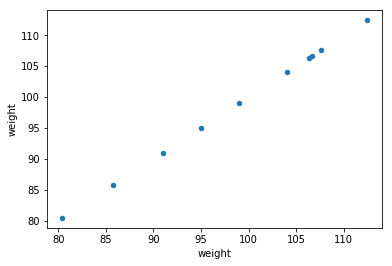

In [12]:
dataframe.plot(kind='scatter', x='weight', y='weight')
                

In [13]:
@interact
def scatter_plot(x=list(dataframe.select_dtypes('number').columns), 
                 y=list(dataframe.select_dtypes('number').columns)[1:]):
    
    dataframe.plot(kind='scatter', x=x, y=y)

interactive(children=(Dropdown(description='x', options=('weight', 'favourite_integer', 'bad_column'), value='…

In [15]:
@interact
def splitter(text=widgets.Textarea(
    value='Hello World',
    placeholder='Type something',
    description='String:',
    disabled=False
)):
    return [a.strip('H') for a in text.split()]

interactive(children=(Textarea(value='Hello World', description='String:', placeholder='Type something'), Outp…

In [16]:
import re
@interact
def splitter(
    text=widgets.Textarea(
        value='Hello World 0754562974'),
    pattern=widgets.Textarea(
        value='\d+')):
    print(re.findall(pattern, text))
#     print(re.sub(pattern,'REPLACEMENT_TEXT',text))


interactive(children=(Textarea(value='Hello World 0754562974', description='text'), Textarea(value='\\d+', des…

In [17]:
import datetime
@interact
def dat_str(
    date=widgets.DatePicker(
        value=datetime.datetime.now(),
        description='Pick a Date'),
    fmt='%Y-%m-%d %H:%M:%S.%f'):
    print(date.__class__)
    return date.strftime(fmt)

interactive(children=(DatePicker(value=datetime.datetime(2019, 6, 26, 17, 1, 18, 903342), description='Pick a …